# Vehicle Detection

In [1]:
#Import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from glob import glob
from natsort import natsorted
from copy import deepcopy
%matplotlib inline

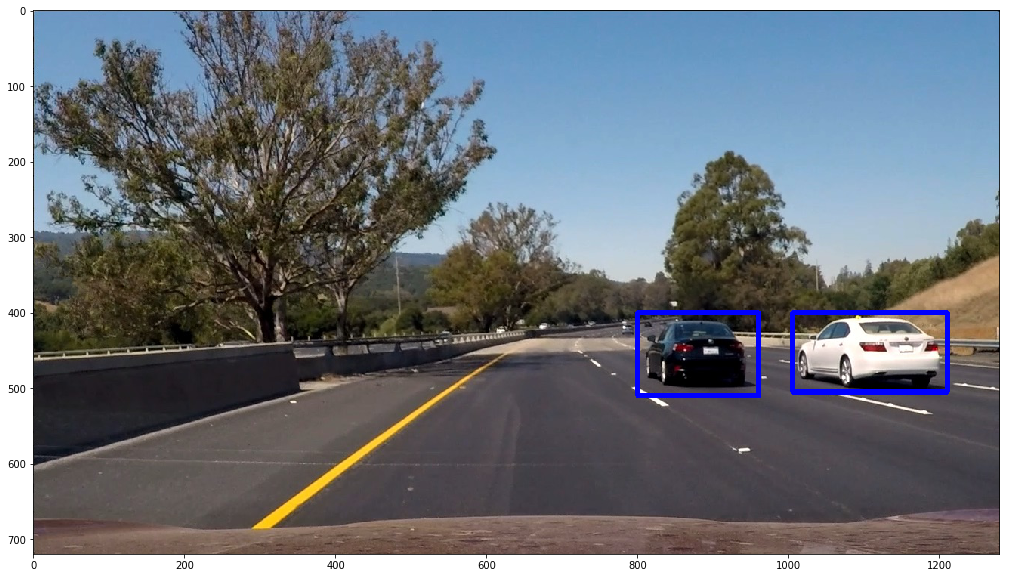

In [2]:
image = mpimg.imread('test_images/test6.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    for i in range(len(bboxes)):
        cv2.rectangle(draw_img, bboxes[i][0], bboxes[i][1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes
# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((800, 400), (960, 510)), ((1005, 400), (1210, 505))]

result = draw_boxes(image, bboxes)
plt.figure(figsize=(20,10))
plt.imshow(result);


In [3]:
'''
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list;
'''

"\n# Define a function to search for template matches\n# and return a list of bounding boxes\ndef find_matches(img, template_list):\n    # Define an empty list to take bbox coords\n    bbox_list = []\n    # Define matching method\n    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',\n    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'\n    method = cv2.TM_CCOEFF_NORMED\n    # Iterate through template list\n    for temp in template_list:\n        # Read in templates one by one\n        tmp = mpimg.imread(temp)\n        # Use cv2.matchTemplate() to search the image\n        result = cv2.matchTemplate(img, tmp, method)\n        # Use cv2.minMaxLoc() to extract the location of the best match\n        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)\n        # Determine a bounding box for the match\n        w, h = (tmp.shape[1], tmp.shape[0])\n        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:\n            top_left = min_loc\n        else:

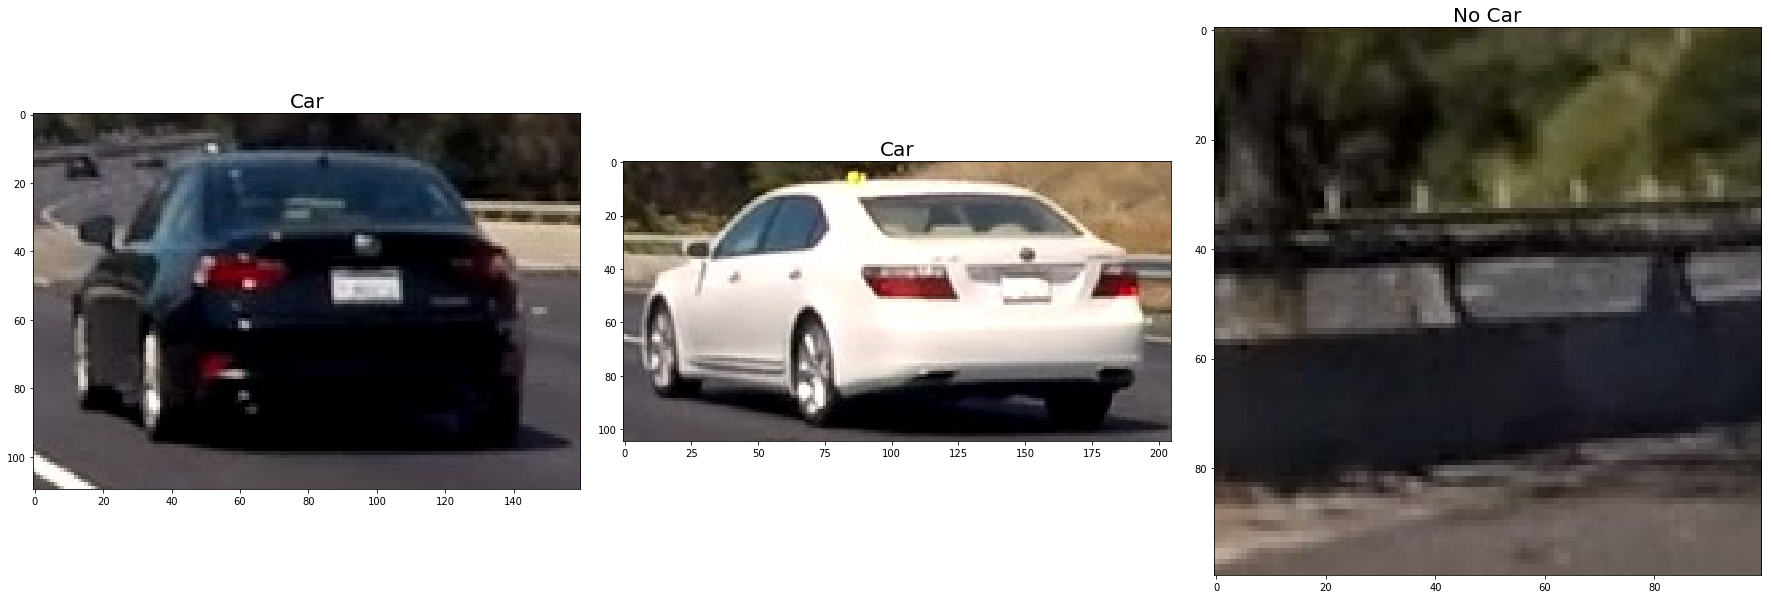

In [4]:
img = mpimg.imread('test_images/test6.jpg')
bboxes = [((800, 400), (960, 510)), ((1005, 400), (1210, 505))]
pt1, pt2 = bboxes[0]
x1, y1 = pt1
x2, y2 = pt2
car1 = img[y1:y2, x1:x2]
pt1, pt2 = bboxes[1]
x1, y1 = pt1
x2, y2 = pt2
car2 = img[y1:y2, x1:x2]
nocar = img[400:500, 400:500]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax = np.ravel(ax)
imgs = [car1, car2, nocar]
titles = ['Car', 'Car', 'No Car']
for i in range(len(imgs)):
    ax[i].imshow(imgs[i])
    ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=1.0, bottom=0.)

Notes:
- Convert images to HSV space rather than RGB space. Cars tend to be more saturated in color and will be more prominent in the S and V place than the background.
- Explore different color spaces and check in which cars stand out from non-car images.
- Download Udacity training dataset

In [5]:
#Change color scale of the image
def colorscale(img, color_scale = 'RGB'):
    if color_scale != 'RGB':
        if color_scale == 'gray':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        elif color_scale == 'HLS':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_scale == 'HSV':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_scale == 'LUV':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_scale == 'YUV':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_scale == 'YCrCb':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return img

In [6]:
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

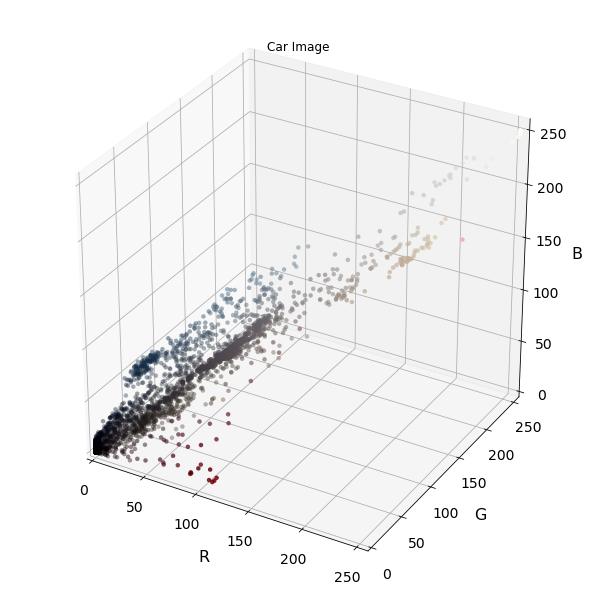

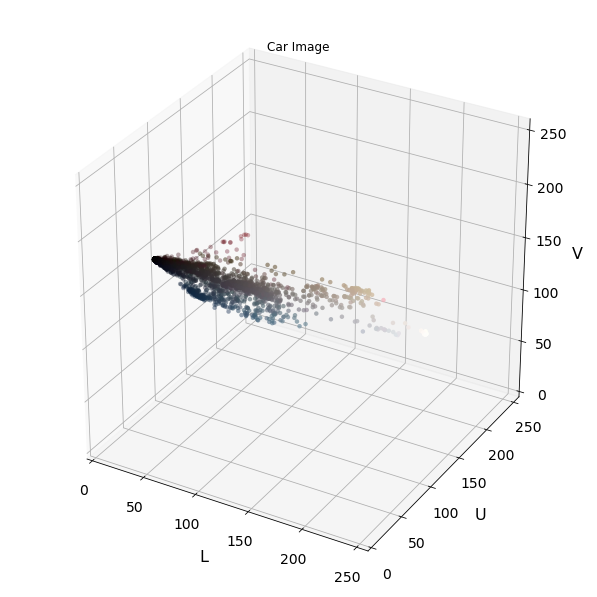

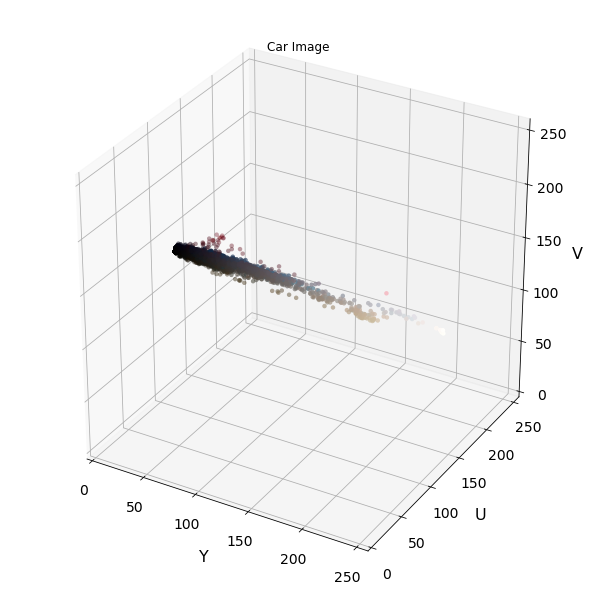

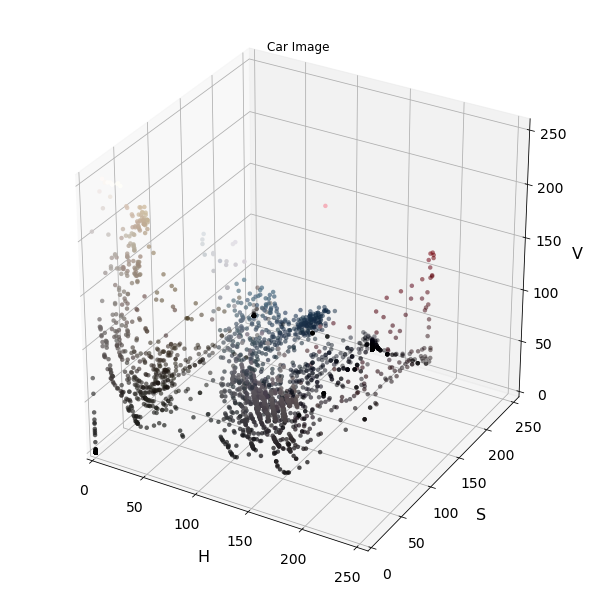

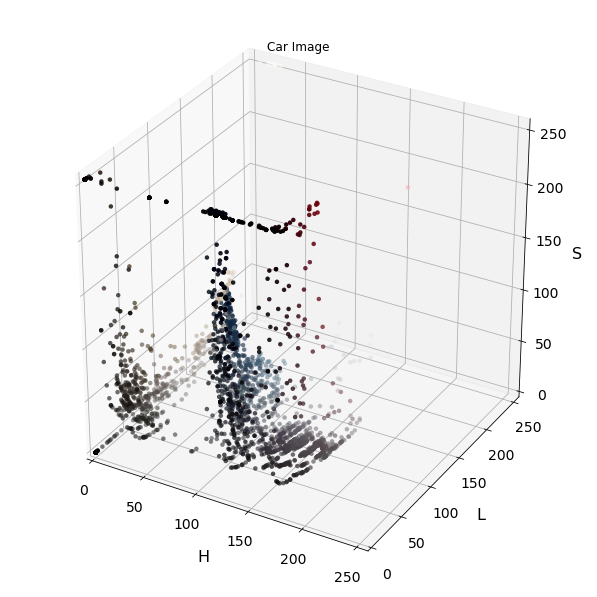

In [7]:
# Read a color image
#img = cv2.imread("test_images/test6.jpg")
img = car1

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
#img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_RGB = img_small
img_small_HSV = colorscale(img_small, color_scale='HSV')
img_small_LUV = colorscale(img_small, color_scale='LUV')
img_small_YUV = colorscale(img_small, color_scale='YUV')
img_small_HLS = colorscale(img_small, color_scale='HLS')
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.title('Car Image')
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.title('Car Image')
plt.show()

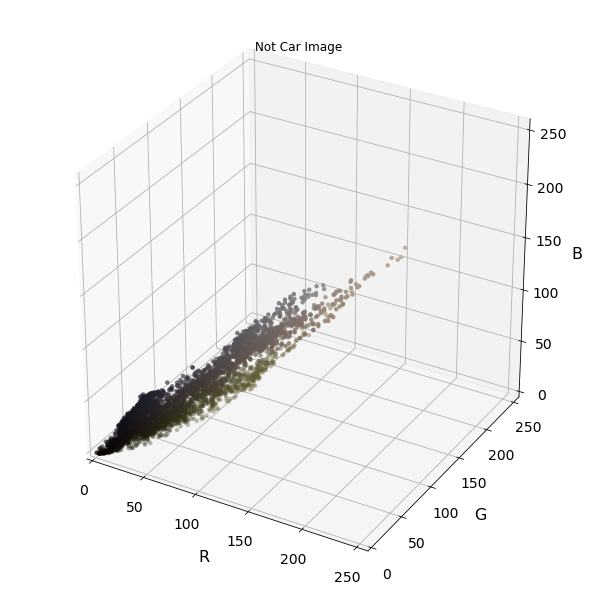

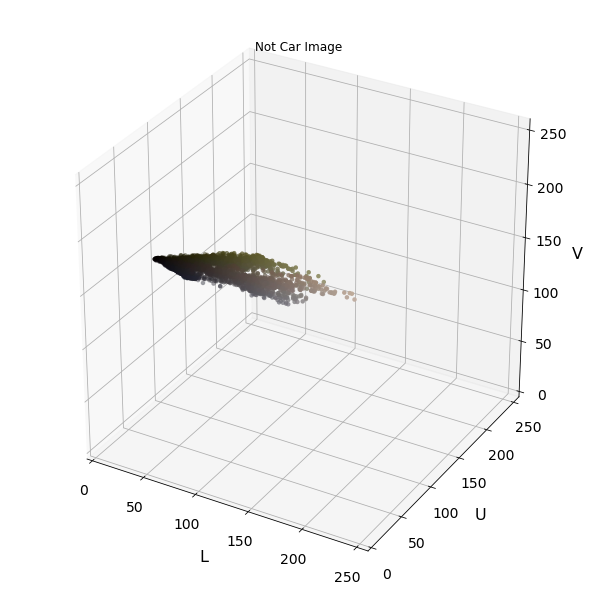

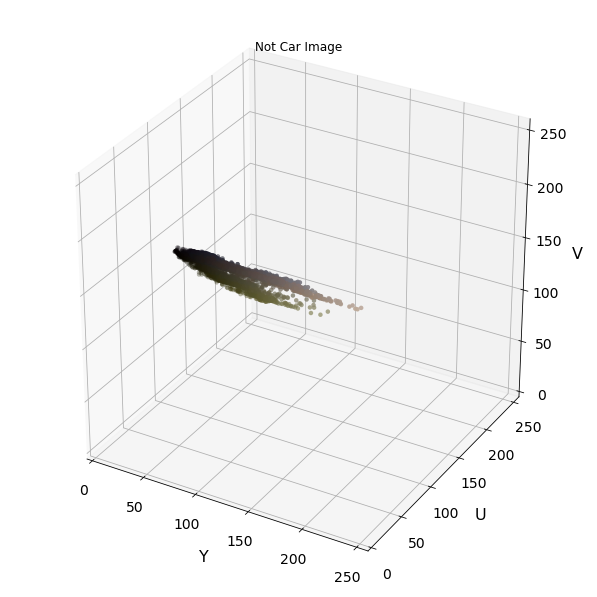

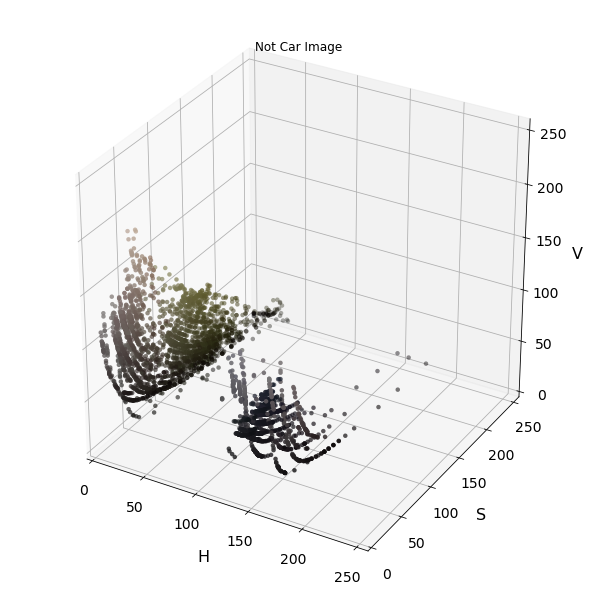

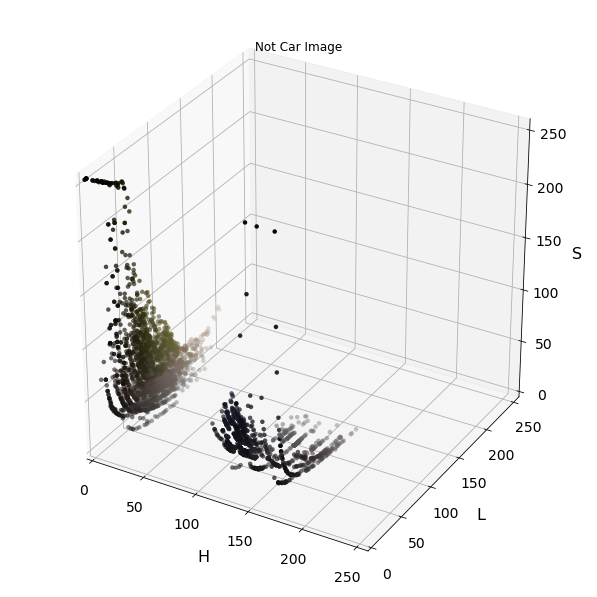

In [8]:
# Read a color image
#img = cv2.imread("test_images/test6.jpg")
img = nocar

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
#img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_RGB = img_small
img_small_HSV = colorscale(img_small, color_scale='HSV')
img_small_LUV = colorscale(img_small, color_scale='LUV')
img_small_YUV = colorscale(img_small, color_scale='YUV')
img_small_HLS = colorscale(img_small, color_scale='HLS')
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.title('Not Car Image')
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.title('Not Car Image')
plt.show()

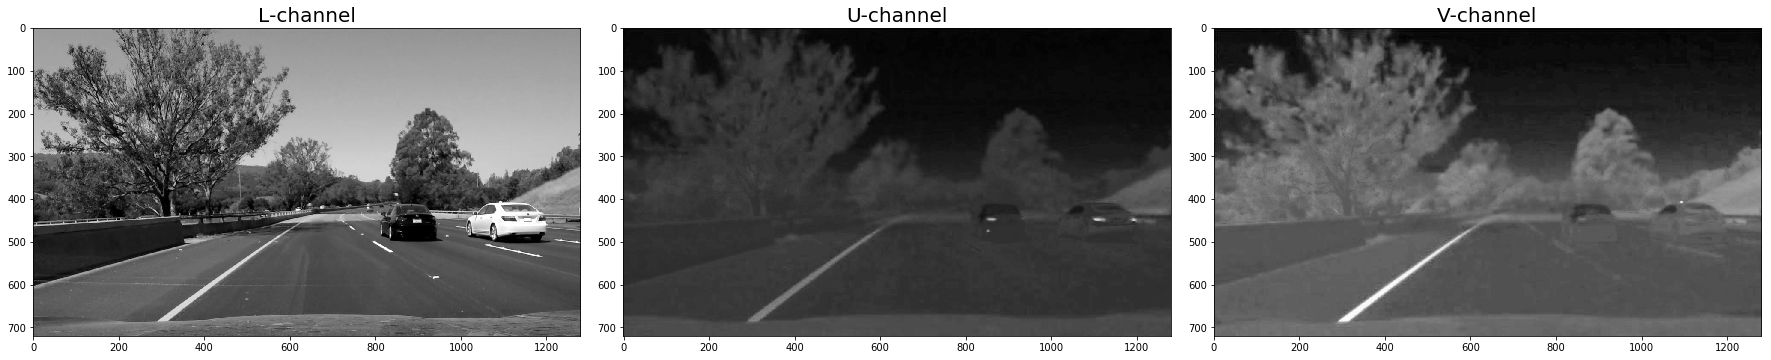

In [9]:
img = mpimg.imread("test_images/test6.jpg")
LUV = colorscale(img, color_scale = 'LUV')
L = LUV[:,:,0]
U = LUV[:,:,1]
V = LUV[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax = np.ravel(ax)
imgs = [L, U, V]
titles = ['L-channel', 'U-channel', 'V-channel']
for i in range(len(imgs)):
    ax[i].imshow(imgs[i], cmap = 'gray')
    ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=1.0, bottom=0.)

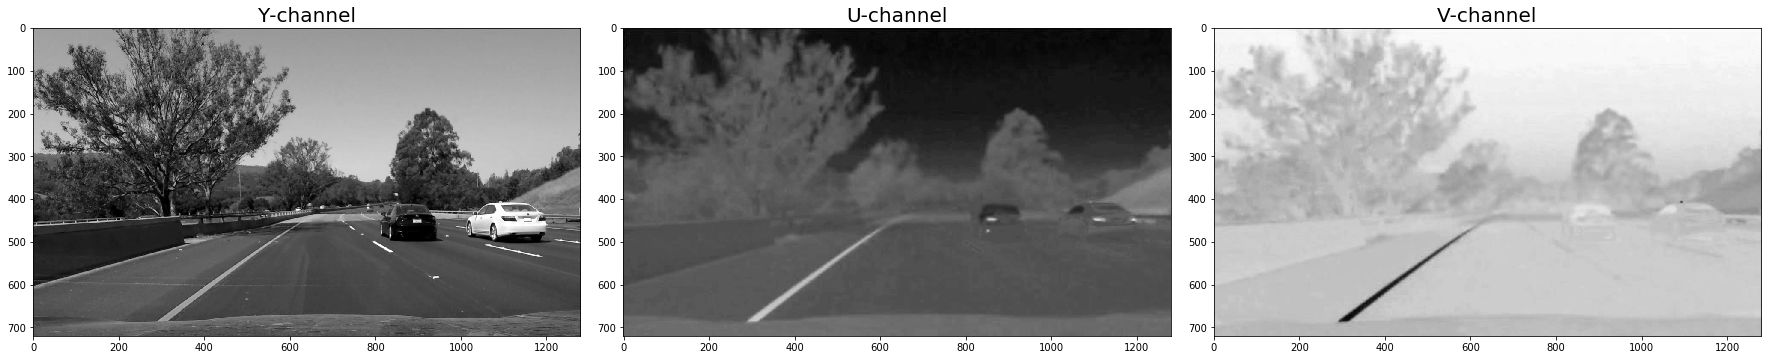

In [10]:
YUV = colorscale(img, color_scale = 'YUV')
Y = YUV[:,:,0]
U = YUV[:,:,1]
V = YUV[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax = np.ravel(ax)
imgs = [Y, U, V]
titles = ['Y-channel', 'U-channel', 'V-channel']
for i in range(len(imgs)):
    ax[i].imshow(imgs[i], cmap = 'gray')
    ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=1.0, bottom=0.)

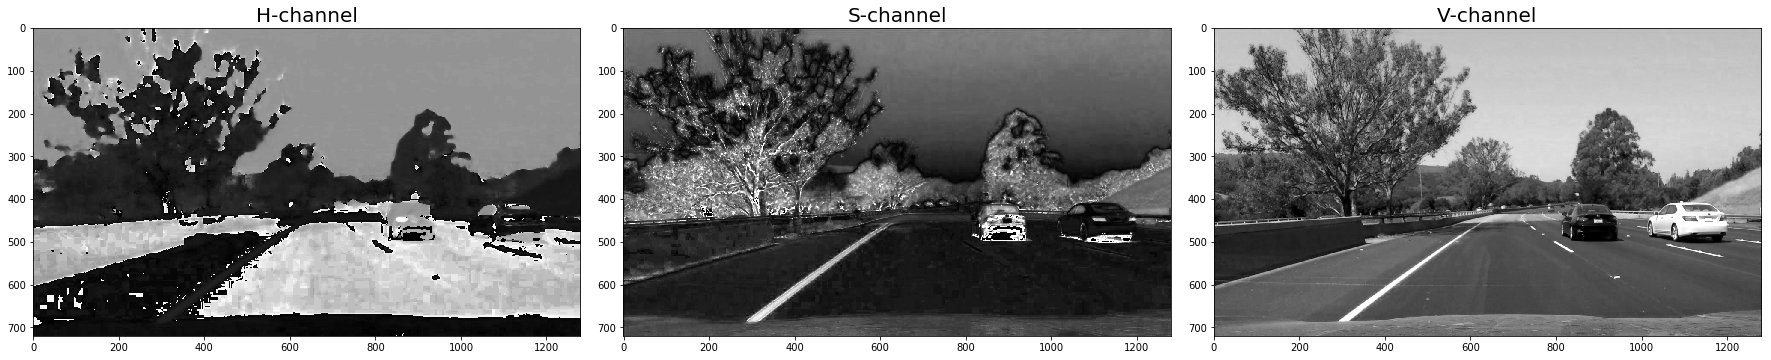

In [11]:
HSV = colorscale(img, color_scale = 'HSV')
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax = np.ravel(ax)
imgs = [H, S, V]
titles = ['H-channel', 'S-channel', 'V-channel']
for i in range(len(imgs)):
    ax[i].imshow(imgs[i], cmap = 'gray')
    ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=1.0, bottom=0.)

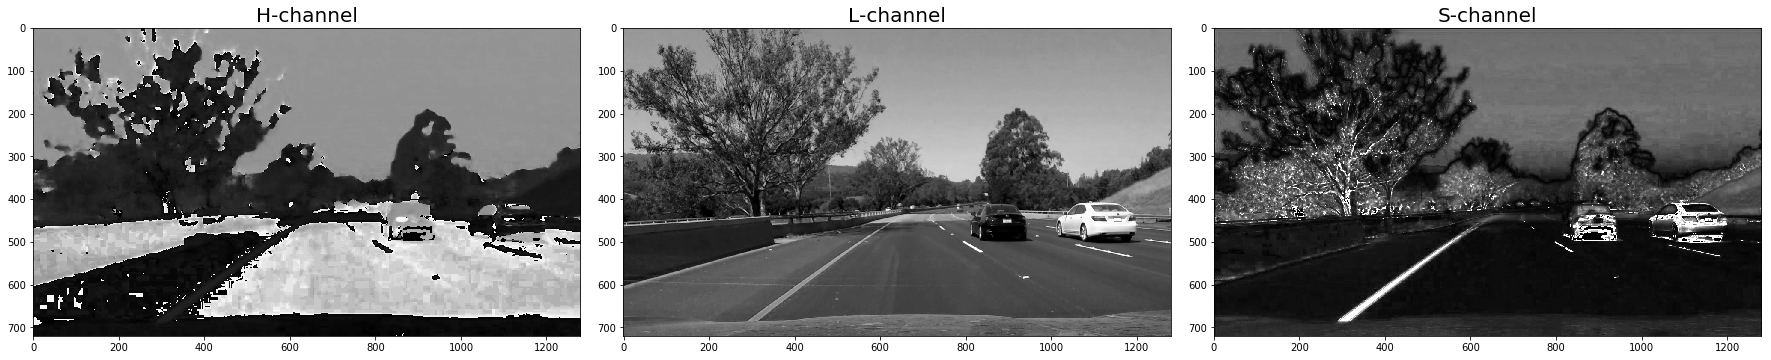

In [12]:
HLS = colorscale(img, color_scale = 'HLS')
H = HLS[:,:,0]
L = HLS[:,:,1]
S = HLS[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax = np.ravel(ax)
imgs = [H, L, S]
titles = ['H-channel', 'L-channel', 'S-channel']
for i in range(len(imgs)):
    ax[i].imshow(imgs[i], cmap = 'gray')
    ax[i].set_title(titles[i], fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=1.0, bottom=0.)

In [13]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    img = colorscale(img, color_space)
    img = cv2.resize(img, size)
    # Use cv2.resize().ravel() to create the feature vector
    features = img.ravel()
    # Return the feature vector
    return features

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


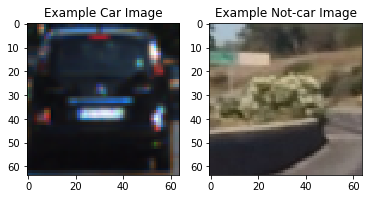

In [14]:
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

images1 = glob(r'C:\Users\stuar\CarND-Vehicle-Detection_TrainingData\non-vehicles\non-vehicles\**\*.png', recursive=True)
notcars = []
for image in images1:
    notcars.append(image)

images2 = glob(r'C:\Users\stuar\CarND-Vehicle-Detection_TrainingData\vehicles\vehicles\**\*.png', recursive=True)
cars = []
for image in images2:
    cars.append(image)

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    testimg = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = testimg.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = testimg.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image');

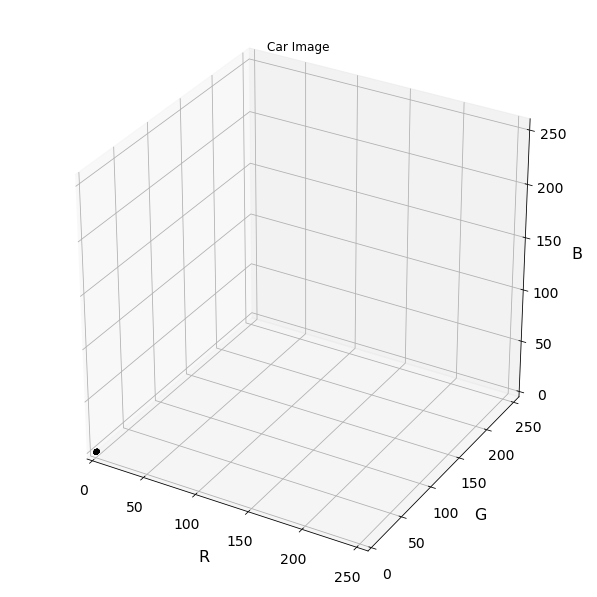

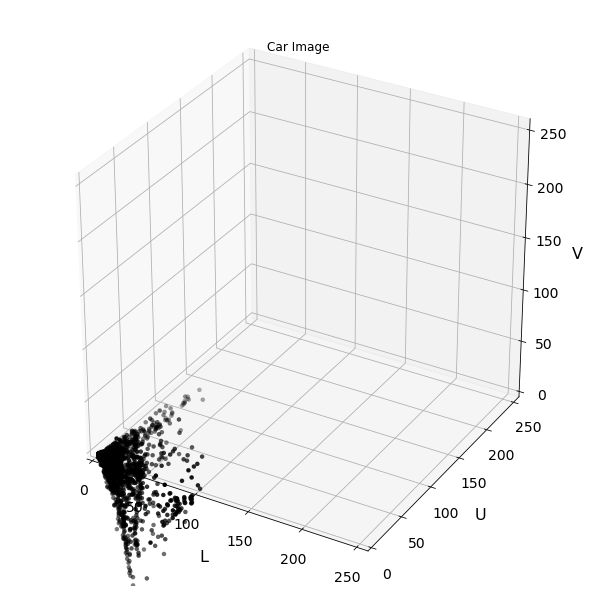

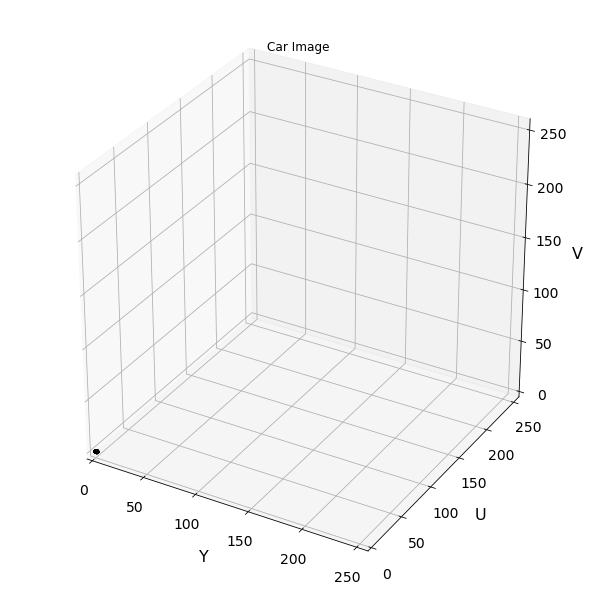

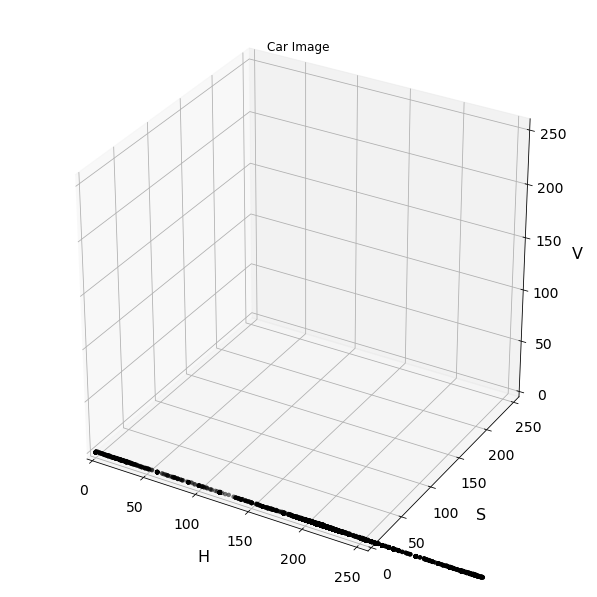

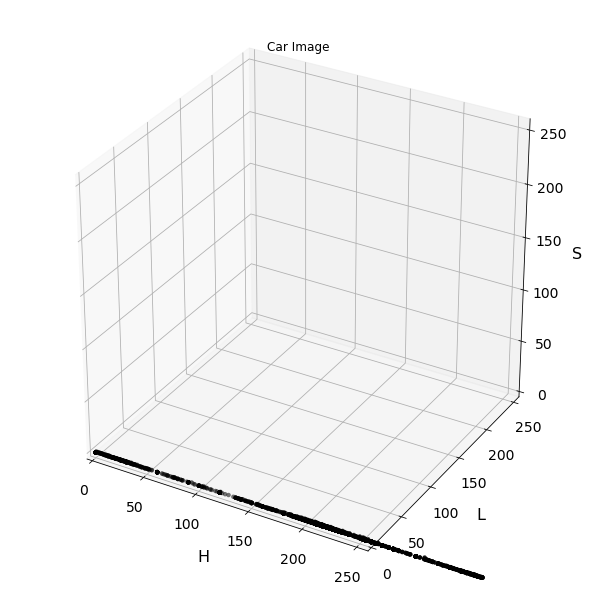

In [15]:
# Read a color image
#img = cv2.imread("test_images/test6.jpg")
img = deepcopy(car_image)

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
#img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_RGB = img_small
img_small_HSV = colorscale(img_small, color_scale='HSV')
img_small_LUV = colorscale(img_small, color_scale='LUV')
img_small_YUV = colorscale(img_small, color_scale='YUV')
img_small_HLS = colorscale(img_small, color_scale='HLS')
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.title('Car Image')
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.title('Car Image')
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.title('Car Image')
plt.show()

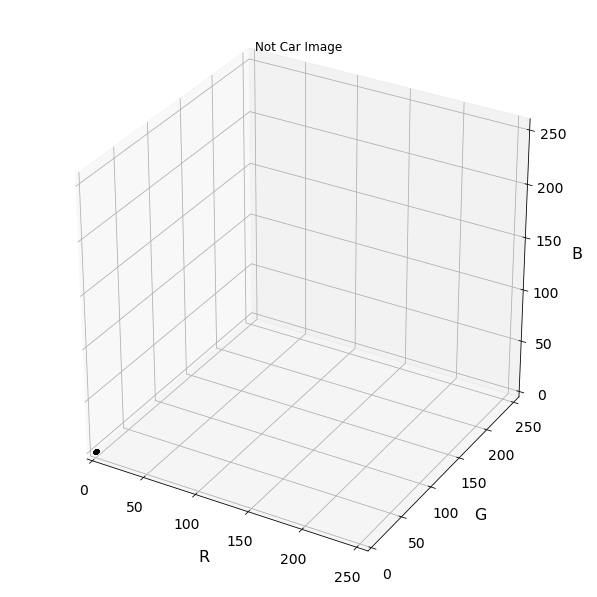

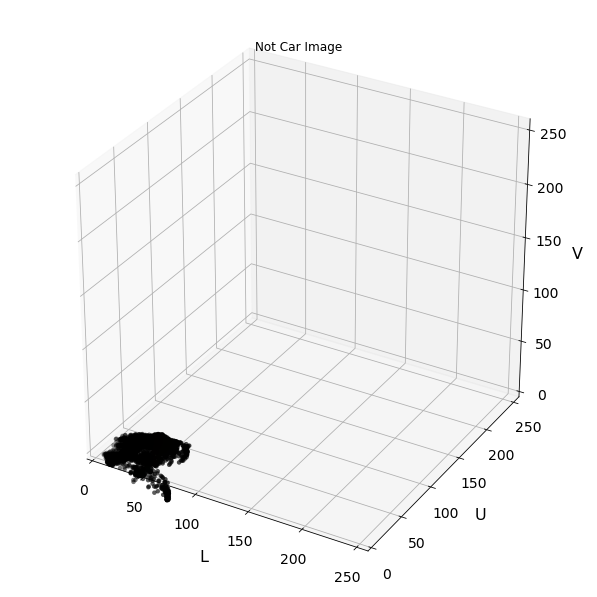

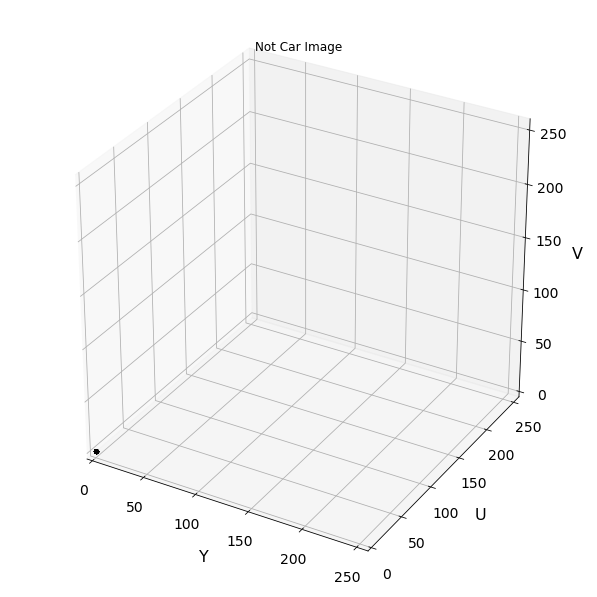

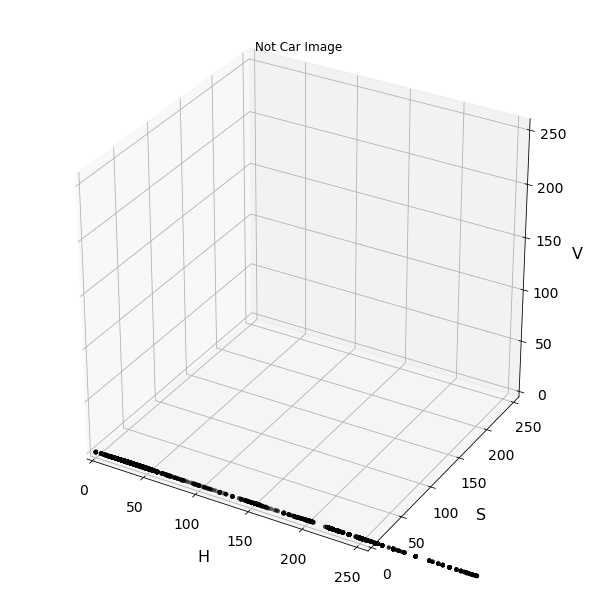

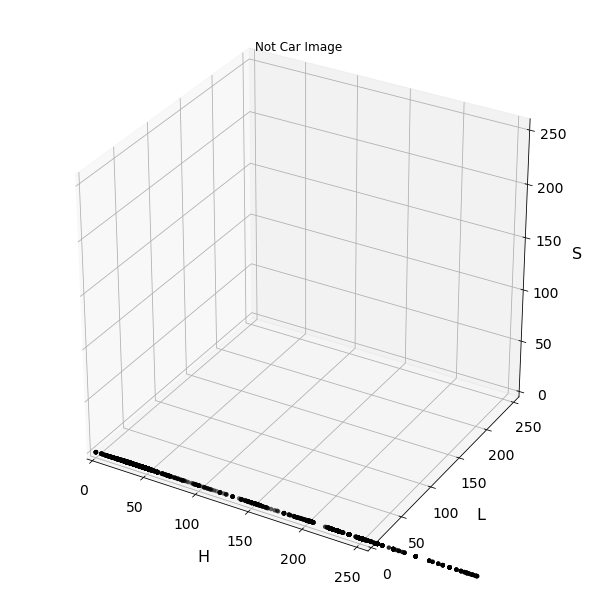

In [16]:
# Read a color image
#img = cv2.imread("test_images/test6.jpg")
img = deepcopy(notcar_image)

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
#img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_RGB = img_small
img_small_HSV = colorscale(img_small, color_scale='HSV')
img_small_LUV = colorscale(img_small, color_scale='LUV')
img_small_YUV = colorscale(img_small, color_scale='YUV')
img_small_HLS = colorscale(img_small, color_scale='HLS')
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.title('Not Car Image')
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.title('Not Car Image')
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.title('Not Car Image')
plt.show()

In [17]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    #Calculate bin centers
    bin_edges = channel1_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return channel1_hist, channel2_hist, channel3_hist, bin_centers, hist_features

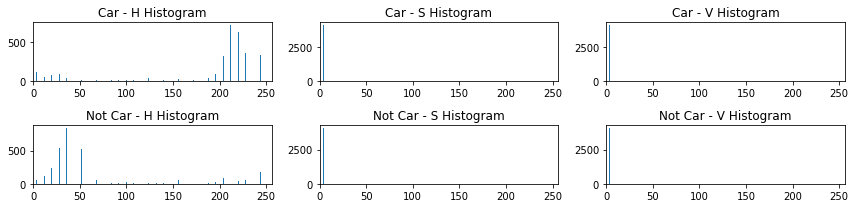

In [18]:
HSVcar = colorscale(car_image, color_scale = 'HSV')
HSVnocar = colorscale(notcar_image, color_scale = 'HSV')

channel1_hist_car, channel2_hist_car, channel3_hist_car, bin_centers_car, hist_features_car = color_hist(HSVcar, nbins=32, bins_range=(0, 256))
channel1_hist_nocar, channel2_hist_nocar, channel3_hist_nocar, bin_centers_nocar, hist_features_nocar = color_hist(HSVnocar, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if channel1_hist_car is not None and channel1_hist_nocar is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(231)
    plt.bar(bin_centers_car, channel1_hist_car[0])
    plt.xlim(0, 256)
    plt.title('Car - H Histogram')
    plt.subplot(232)
    plt.bar(bin_centers_car, channel2_hist_car[0])
    plt.xlim(0, 256)
    plt.title('Car - S Histogram')
    plt.subplot(233)
    plt.bar(bin_centers_car, channel3_hist_car[0])
    plt.xlim(0, 256)
    plt.title('Car - V Histogram')
    plt.subplot(234)
    plt.bar(bin_centers_nocar, channel1_hist_nocar[0])
    plt.xlim(0, 256)
    plt.title('Not Car - H Histogram')
    plt.subplot(235)
    plt.bar(bin_centers_nocar, channel2_hist_nocar[0])
    plt.xlim(0, 256)
    plt.title('Not Car - S Histogram')
    plt.subplot(236)
    plt.bar(bin_centers_nocar, channel3_hist_nocar[0])
    plt.xlim(0, 256)
    plt.title('Not Car - V Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

In [19]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=True,
                     feature_vec=True):
                         
    """
    Function accepts params and returns HOG features (optionally flattened) and an optional matrix for 
    visualization. Features will always be the first return (flattened if feature_vector= True).
    A visualization matrix will be the second return if visualize = True.
    """
    
    return_list = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys', transform_sqrt=False, 
                                  visualise= vis, feature_vector= feature_vec)
    
    # name returns explicitly
    hog_features = return_list[0]
    if vis:
        hog_image = return_list[1]
        return hog_features, hog_image
    else:
        return hog_features

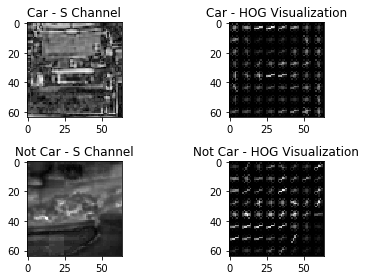

In [20]:
car_image_S = HSVcar[:,:,1]   
featurescar, hog_imagecar = get_hog_features(car_image_S, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=True)

nocar_image_S = HSVnocar[:,:,1]
featuresnocar, hog_imagenocar = get_hog_features(nocar_image_S, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=True)


# Plot the examples
fig = plt.figure()
plt.subplot(221)
plt.imshow(car_image_S, cmap='gray')
plt.title('Car - S Channel')
plt.subplot(222)
plt.imshow(hog_imagecar, cmap='gray')
plt.title('Car - HOG Visualization')
plt.subplot(223)
plt.imshow(nocar_image_S, cmap='gray')
plt.title('Not Car - S Channel')
plt.subplot(224)
plt.imshow(hog_imagenocar, cmap='gray')
plt.title('Not Car - HOG Visualization')
fig.tight_layout();

In [36]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        feature_image = colorscale(image, color_scale = cspace)          
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        channel1_hist, channel2_hist, channel3_hist, bin_centers, hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

In [37]:
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

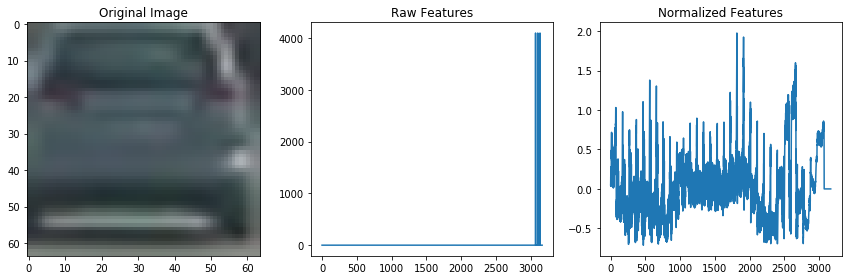

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if len(car_features) > 0:
    # Define a labels vector based on features lists
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
    # Fit a per-column scaler only on the training data
    X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to both X_train and X_test
    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(Xtrain[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_Xtrain[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [ ]:
import time
from sklearn.svm import LinearSVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)

In [ ]:
print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        feature_image = colorscale(image, color_scale = cspace)     

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features


# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### Parameters for HOG feature extraction
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


In [ ]:
def split_scale(car_features, notcar_features):
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rand_state)

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to X
    X_train = X_scaler.transform(X_train)
    X_test = X_scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

In [ ]:
def train(X_train, y_train):
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
    return svc